In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [143]:
ipl_path = '/home/atharva/Projects/IPL(08-16)/'
matches = pd.read_csv(ipl_path+'matches.csv')
matches.shape

(636, 18)

In [144]:
#First look at the dataset:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [145]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


# Missing Values:

There are a total of 636 matches played. But there have been only 633 winners. This would mean there have been 3 matches without a result. Consequencially there are 3 missing values for player_of_the_match as well. Moreover, there is one missing entry for both umpire1 and umpire2, and 7 missing city entries.

There are no entries for 'umpire3', so we should drop the entire column.

Missing values for umpire1,umpire2 and cities do not hold that much of an importancce for our analysis so we can leave them as 'NaN'.

Let us deal with the missing values in 'winner', and umpire3 one-by-one:

In [146]:
#Replace missing 'winner' values to 'No Result':

matches['winner'].fillna('No Result', inplace = True)

#Drop the umpire3 column from the dataset:

matches = matches.drop('umpire3',axis=1)

In [147]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             636 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
dtypes: int64(5), object(12)
memory usage: 84.5+ KB


In [148]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,636.000000,636.000000,636.000000,636.000000,636.000000
mean,318.500000,2012.490566,0.025157,13.682390,3.372642
std,183.741666,2.773026,0.156726,23.908877,3.420338
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,159.750000,2010.000000,0.000000,0.000000,0.000000
50%,318.500000,2012.000000,0.000000,0.000000,4.000000
75%,477.250000,2015.000000,0.000000,20.000000,7.000000
max,636.000000,2017.000000,1.000000,146.000000,10.000000


Since The Median win_by_runs is 0, it is clear that at least half of win_by_runs entries are 0. Thus at least half of win_by_wicket values are non-zero. This information will be useful when we analyse total number of wins batting first and second respectively.

In [149]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [150]:
len(matches['season'].unique())

10

In [151]:
#Biggest win batting 1st:

matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [152]:
#Biggest win batting second :
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

Coincidently, for both of the above matches, the umpires were the same, Nitin Menon and CK Nandan.

In [153]:
#Smallest win batting 1st:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [154]:
#Smallest win batting 2nd:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
Name: 559, dtype: object

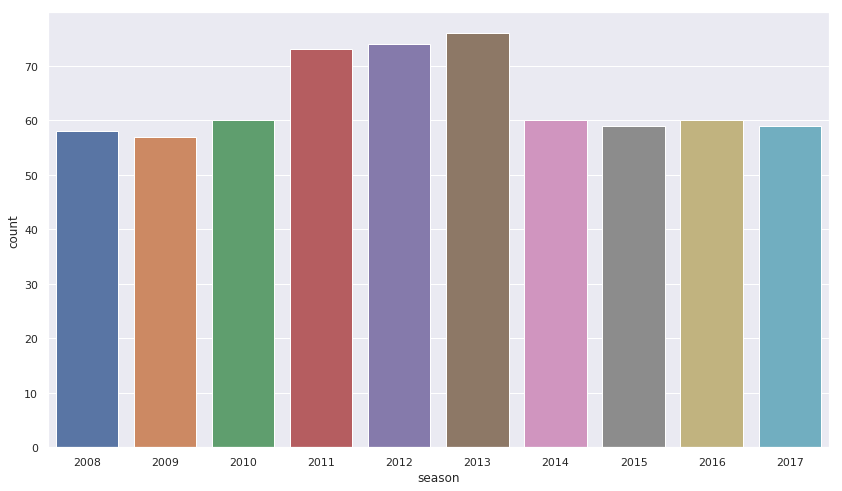

In [155]:
sns.countplot(x='season', data=matches)
plt.show()

There were more teams participating in the tournament from 2011 till 2013, thus the match count of these seasons is greater than the rest. 

In [141]:
teams = matches['team1'].unique()
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

There are some entries for team 'Rising Pune Supergiants' which are named 'Rising Pune Supergiant' instead. We should probably fix this:

In [139]:
matches = matches.replace('Rising Pune Supergiant','Rising Pune Supergiants')

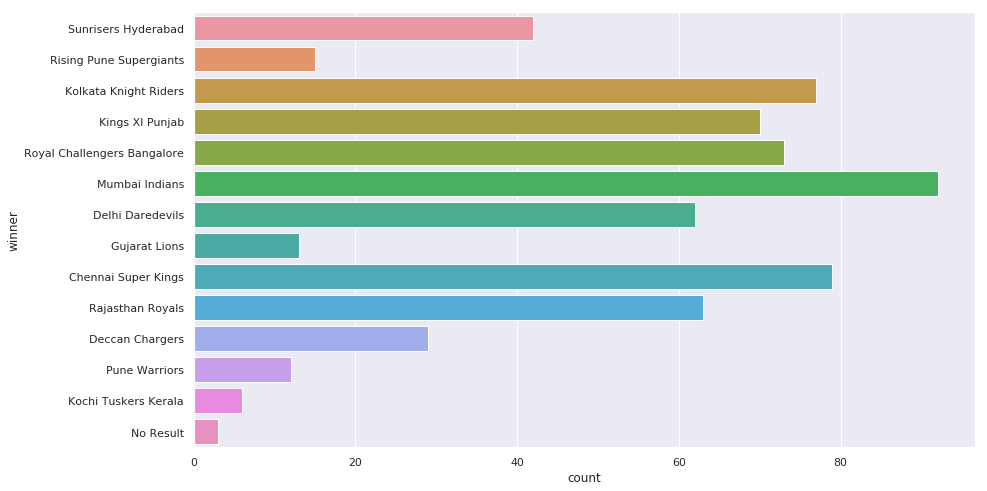

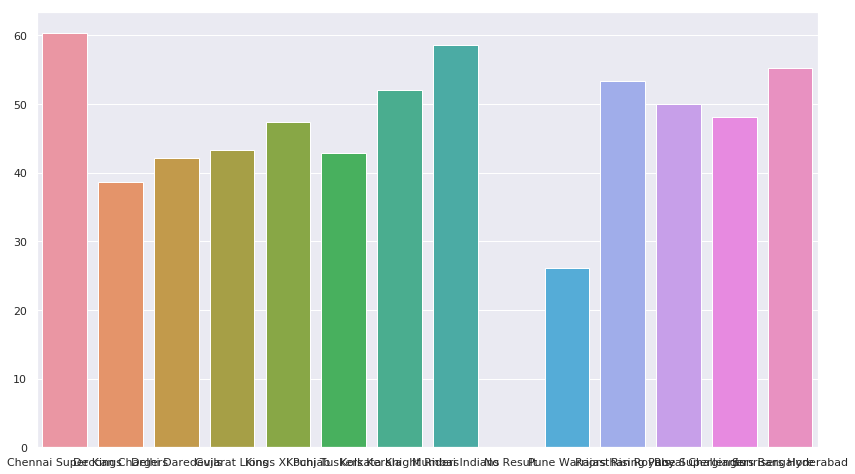

In [140]:
sns.countplot(y='winner', data = matches)
plt.show()
data = matches.winner.value_counts()
total = matches.team1.value_counts()
total += matches.team2.value_counts()
total
win_perc = data/total*100
win_perc
sns.barplot(x = win_perc.index, y = win_perc, orient='v');

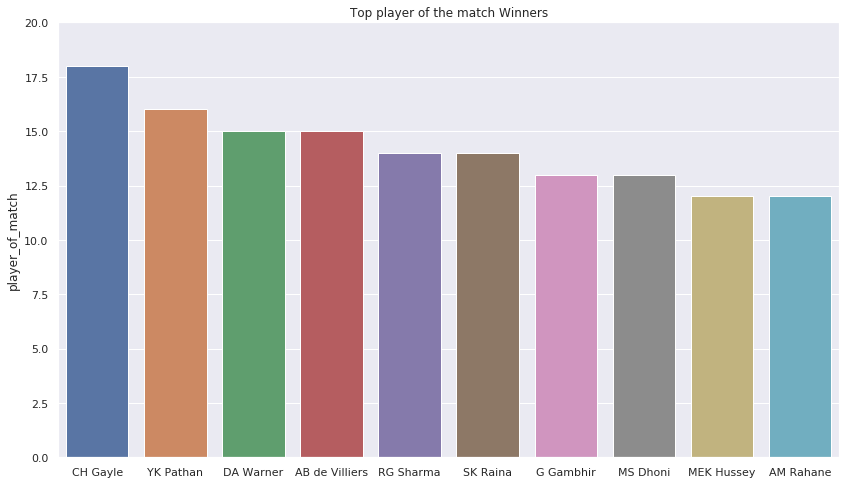

In [114]:
#Most player of the matches won by players:

top_players = matches.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")

sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

There is not a single bowler in the above plot, emphasizing how batting dominates in the IPL.

In [115]:
#If winning the toss aids in winning the match:
tw = matches['toss_winner'] == matches['winner']
tw.groupby(tw).size()

False    311
True     325
dtype: int64

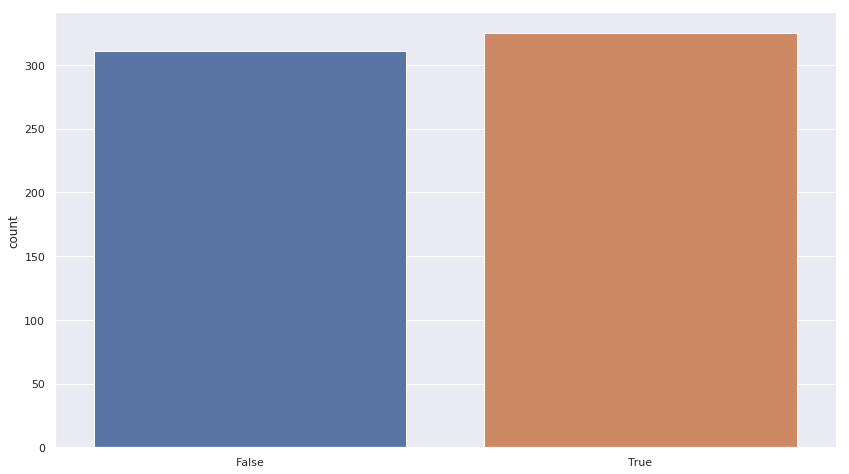

In [116]:
sns.countplot(matches['toss_winner'] == matches['winner'])

There are more instances supporting the hypothesis, but it is not a deciding difference. Thus we can say winning the toss generally does not affect the result of the match.

In [117]:
#What teams prefer to choose after winning the toss:
chose_to_bat = matches['toss_decision'] == 'bat'
chose_to_bat.groupby(chose_to_bat).size()

toss_decision
False    363
True     273
Name: toss_decision, dtype: int64

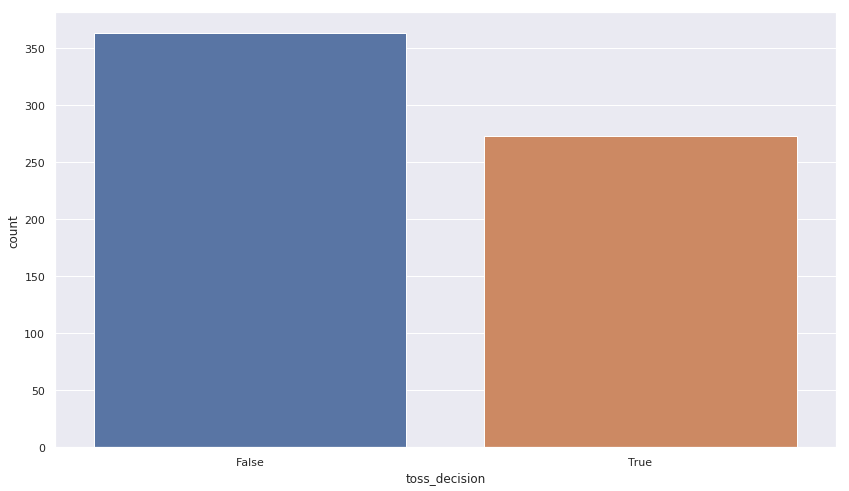

In [118]:
sns.countplot(matches['toss_decision'] == 'bat')

Here the difference is big enough to deduce that teams generally prefer fielding first upon winning the toss.

Next, we analyse the umpires:

In [119]:
umpires = matches.umpire1.value_counts()[:10]

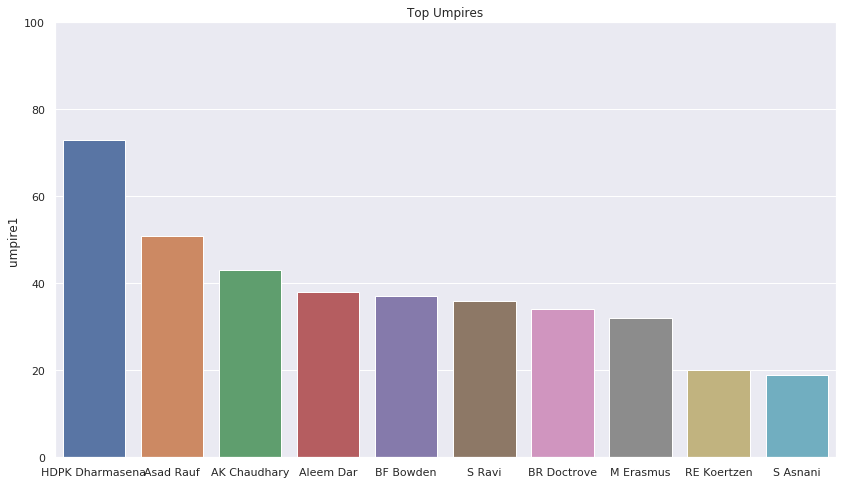

In [120]:
fig, ax = plt.subplots()
ax.set_ylim([0,100])
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
sns.barplot(x = umpires.index, y = umpires, orient='v'); #palette="Blues");
plt.show()

Next, we check for number of wins batting 1st and 2nd :

In [121]:
wins_setting = matches['win_by_wickets'] == 0
chose_to_bat.groupby(wins_setting).size()

win_by_wickets
False    339
True     297
Name: toss_decision, dtype: int64

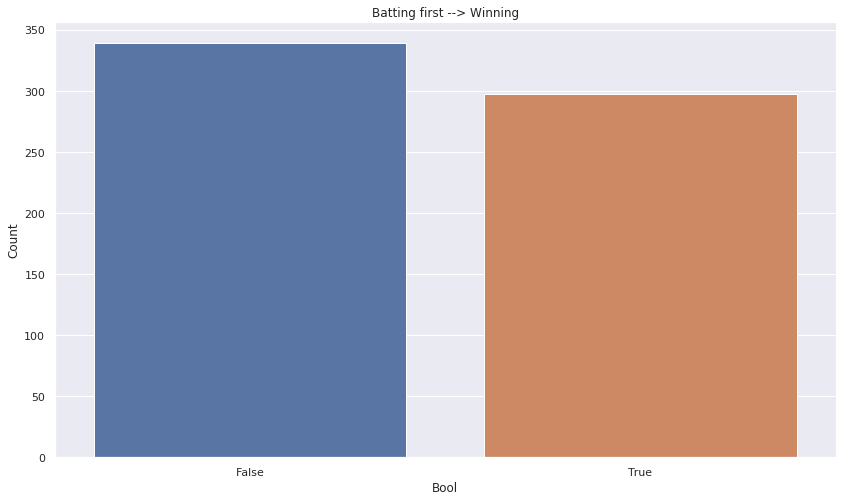

In [137]:
sns.countplot(wins_setting)
plt.title("Batting first --> Winning")
plt.xlabel('Bool')
plt.ylabel('Count')

Teams batting 2nd have won more number of times than Teams batting 1st.